In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ephesus.sentence import *
import pandas as pd
import spacy 

In [106]:
data = extract_json("PROJECT_EPHESUS-labeling_v03.json")
dico = tune_data(data)
train_set, test_set = create_training_set(dico)

In [107]:
create_set(dico, "full_train_v2.spacy")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 450/450 [00:08<00:00, 51.77it/s]

training data created under '../raw_data/full_train_v2.spacy'


In [5]:
nlp = load_model("../models/model_small/model-best")

In [6]:
test = test_set["annotations"][5]['text']
doc = nlp(test)
spacy.displacy.render(doc, style="ent",jupyter=True)

In [6]:
create_training_data(test_set, "test_set_02.spacy")

100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 202.35it/s]

training data created under '../raw_data/test_set_02.spacy'


Test de return_label vs. original labelisation

In [7]:
return_label(sentence,nlp)

NameError: name 'sentence' is not defined

In [ ]:
df_test = pd.DataFrame(test_set["annotations"])
liste_test = df_test.iloc[0,1]

In [ ]:
sentence = df_test.iloc[0,0]
sentence

In [ ]:
for elm in liste_test:
    print(sentence[elm[0]:elm[1]])
    print(elm[2])

In [ ]:
def test(sentence, ents):
    liste = []
    for elm in ents:
        
        liste.append((sentence[elm[0]:elm[1]],elm[2]))
    return liste
        
        
    

In [ ]:
test(sentence,liste_test)

In [ ]:
create_training_data(test_set, "test_set.spacy")

# Tuto from https://www.kaggle.com/code/finalepoch/medical-ner-using-spacy

In [4]:
from __future__ import unicode_literals, print_function
import random
from pathlib import Path
from spacy.util import minibatch, compounding
import sys

In [ ]:
dico

In [ ]:
def train_model(model=None, output_dir="../models/test_model", n_iter=1000):
    
    if model is not None:
        nlp = spacy.load(model)
        print("Loaded model '%s'" %model)
    else:
        nlp = spacy.blank("fr")
        print("Created blank 'fr' model")
        
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe('ner')
    else:
        ner = nlp.get_pipe("ner")
        
    pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        if model is None:
            nlp.begin_training()
        for itn in range(n_iter):
            random.shuffle(dico["annotations"])
            losses = {}
            batches = minibatch(dico["annotations"], size=compounding(4.0, 64.0, 1.2))
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(
                    texts,  
                    annotations,  
                    drop=0.20, 
                    losses=losses
                   
                )
            print("Losses", losses)

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

In [ ]:
nlp = spacy.blank("fr")

In [ ]:
nlp.add_pipe('ner')

In [ ]:
nlp = load_model("../models/model_small/model-best")

In [ ]:
nlp.pipe_names

In [ ]:
TRAIN_DATA = dico["annotations"]

In [ ]:
# Import requirements
import random
from spacy.util import minibatch, compounding
from pathlib import Path
from spacy.training import Example

nlp = spacy.blank("fr")
nlp.add_pipe('ner')
nlp.begin_training()
# TRAINING THE MODEL  

In [ ]:
text = TRAIN_DATA[0]["text"]
text

In [ ]:
annotations = TRAIN_DATA[1]
annotations

In [ ]:
example = Example.from_dict(nlp.make_doc(text), annotations)

In [ ]:
example

In [ ]:
nlp.update([example])

In [ ]:
TRAIN_DATA

In [ ]:
TRAIN_DATA[0]

In [ ]:
{'entities':TRAIN_DATA[1]['entities']}

In [ ]:
len(TRAIN_DATA)

In [ ]:
nlp = spacy.blank("fr")
nlp.add_pipe('ner')
nlp.begin_training()
# TRAINING THE MODEL

example = []
i= 0
for elm in TRAIN_DATA:
    example = Example.from_dict(nlp.make_doc(elm['text']),{'entities':elm['entities']})
    nlp.update([example], drop=0.5)
    print("Losses", losses)
    print(i)
    i += 1
    
    

In [ ]:
TRAIN_DATA[9]

In [ ]:
doc = nlp("Sous-cutanée débuté le 3 septembre, 2 fois par jour. Jusqu'au. 8 septembre.")
spacy.displacy.render(doc, style="ent",jupyter=True)

In [6]:
from ephesus.data import *

In [9]:
nlp = load_model("../models/model_full/model-best")

In [10]:
data = get_data_csv()
data.head()

,translation,TreatmentDetected_1,NGAP_1,Cotation_1,Hour_1,AldRelated_1,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,CareOnPublicHoliday_1,CareLocation_1,CareBeginHpName_1,ZoneName_1,IK_1
fichier,,,,,,,,,,,,,,
9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-e244-4398-8388-19fb5058c9c1,Prise de sang faite le 19 février à domicile p...,NaN,PSG,NaN,10:00:00,True,2022-02-19T10:00:00,1,Days,True,Domicile,Bouvet Pauline,NaN,"{'KilometersNumberPlain': None, 'KilometersNum..."
2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-ba21-434f-883e-1b72df7ea27a,Pansement également refait le 23 mars par mylène.,NaN,PSTA,NaN,18:00:00,True,2022-03-23T18:00:00,1,Days,True,Domicile,Scheuer Mylène,NaN,NaN
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-a01f-4eb5-a1c2-b95205dc389a,Pcr plus prise de sang fait à domicile à 11.,NaN,PV19,NaN,11:00:00,False,2022-03-12T11:00:00,1,Days,True,Domicile,NaN,NaN,NaN
3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-4213-45da-bad6-158592c7f731,Prise de sang et analyse stérile des urines à ...,NaN,PLVA,NaN,09:00:00,True,2022-02-18T09:00:00,1,Days,True,Domicile,NaN,NaN,NaN
2d035c4b-cdfa-4982-87dc-916fe07a0824_56c749ad-eed8-407a-ae9e-a17ebf420cf4,"Bonjour, merci de renouveler cette ordonnance ...",NaN,PLM,NaN,16:00:00,False,2022-03-18T16:00:00,2,Months,True,Domicile,NaN,NaN,NaN


In [11]:
import random
import seaborn as sns

In [12]:
df_extract = data.copy()
df_extract["labels"] = df_extract["translation"].apply(lambda x: return_label(x,nlp))

In [13]:
df_extract.head()

,translation,TreatmentDetected_1,NGAP_1,Cotation_1,Hour_1,AldRelated_1,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,CareOnPublicHoliday_1,CareLocation_1,CareBeginHpName_1,ZoneName_1,IK_1,labels
fichier,,,,,,,,,,,,,,,
9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-e244-4398-8388-19fb5058c9c1,Prise de sang faite le 19 février à domicile p...,NaN,PSG,NaN,10:00:00,True,2022-02-19T10:00:00,1,Days,True,Domicile,Bouvet Pauline,NaN,"{'KilometersNumberPlain': None, 'KilometersNum...","[(Prise de sang, Treatment), (le 19 février, D..."
2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-ba21-434f-883e-1b72df7ea27a,Pansement également refait le 23 mars par mylène.,NaN,PSTA,NaN,18:00:00,True,2022-03-23T18:00:00,1,Days,True,Domicile,Scheuer Mylène,NaN,NaN,"[(Pansement, Treatment), (23 mars, Date)]"
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-a01f-4eb5-a1c2-b95205dc389a,Pcr plus prise de sang fait à domicile à 11.,NaN,PV19,NaN,11:00:00,False,2022-03-12T11:00:00,1,Days,True,Domicile,NaN,NaN,NaN,"[(prise de sang, Treatment), (domicile, Locati..."
3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-4213-45da-bad6-158592c7f731,Prise de sang et analyse stérile des urines à ...,NaN,PLVA,NaN,09:00:00,True,2022-02-18T09:00:00,1,Days,True,Domicile,NaN,NaN,NaN,"[(Prise de sang, Treatment), (analyse stérile ..."
2d035c4b-cdfa-4982-87dc-916fe07a0824_56c749ad-eed8-407a-ae9e-a17ebf420cf4,"Bonjour, merci de renouveler cette ordonnance ...",NaN,PLM,NaN,16:00:00,False,2022-03-18T16:00:00,2,Months,True,Domicile,NaN,NaN,NaN,"[(pansement, Treatment), (bien marqué, Treatme..."


In [14]:
df_extract['CareDurationTypeEnum_1'].unique()

array(['Days', 'Months', 'Weeks', 'Acts', 'Rdvs'], dtype=object)

In [15]:
df_extract['CareDuration_1'].unique()

array([  1,   2,  12,  61,  28,  21,   6,   4,  59,   3,   8,  16,   7,
        15, 184,  11, 181,  32,  89,  14,   5,  62,  18,  20,  86, 218,
       183,  10,  58,  30, 364,  92, 111,  22,  31,  64, 182,  34,  82,
        13, 344,   9,  49,  45,  35,  90, 242,  47, 246, 149, 186, 365,
        19,  72, 141, 298, 176,  52, 339, 159,  25, 267,  29,  26,  36,
       287,  93,  77,  57,  60,  78, 178, 155,  85, 215, 274, 152, 187,
        17, 153, 211,  50, 101, 328,  75, 356,  37,  91,  63,  24, 105,
        23, 334, 231, 238,  42, 100, 343, 191, 160])

<AxesSubplot:xlabel='CareDurationTypeEnum_1', ylabel='Count'>

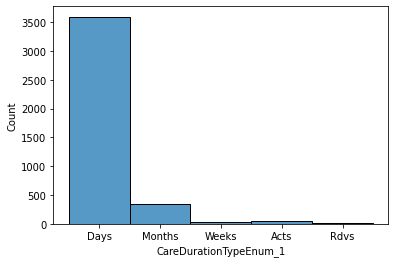

In [16]:
sns.histplot(df_extract['CareDurationTypeEnum_1'])

In [17]:
df_extract.isna().sum()

translation                  0
TreatmentDetected_1       4029
NGAP_1                      59
Cotation_1                3989
Hour_1                       0
AldRelated_1                 0
CareBeginDate_1              0
CareDuration_1               0
CareDurationTypeEnum_1       0
CareOnPublicHoliday_1        0
CareLocation_1               0
CareBeginHpName_1         2641
ZoneName_1                3903
IK_1                      2916
labels                       0
dtype: int64

In [18]:
df_extract['CareBeginHpName_1'].unique()

array(['Bouvet Pauline', 'Scheuer Mylène', nan, 'Lebondidier Amandine',
       'Mathieu Catherine', 'Hoffmann Sylvie', 'Godereaux-gobert Tiffany',
       'Cailhol Sylvie', 'Ceulemans Aline', 'Damay Emeline',
       'Aubry Sandra', 'Brun Christelle', 'Schipman Isabelle',
       'Huret Pauline', 'Balestas Aurore', 'Decard Anais', 'Dousset Anne',
       'Bach Aurore', 'Besancon Sophie', 'Gassert Margaux',
       'Delecluse Sabrina', 'Richard Crevat Myriam', 'Theiller Heloise',
       'Moreaux Perrine', 'Simoes Elodie', 'Schrek Sabrina',
       'Ercker Sylvie', 'Andre Anne', 'Normand Amelie', 'Bellet Alice',
       'Conedera Stebler Anne', 'Devillers Martine', 'Pardini Maite',
       'Cadieu Cécile', 'Carmine Fabrice', 'Cartoux Elodie',
       'Tardieux Lamy Angelique', 'Cathala Aline'], dtype=object)

In [19]:
import numpy as np

def extract(prediction, label):
    liste = []
    for elm in prediction:
        if elm[1] == label:
            liste.append(elm[0])
    if len(liste) == 0:
        return np.nan
    return liste          

In [70]:
df_extract["treatment"] = df_extract['labels'].apply(lambda x: extract(x, 'Treatment'))
df_extract["Date"] = df_extract['labels'].apply(lambda x: extract(x, 'Date'))
df_extract["Location"] = df_extract['labels'].apply(lambda x: extract(x, 'Location'))
df_extract["Duration"] = df_extract['labels'].apply(lambda x: extract(x, 'Duration'))
df_extract["Location"] = df_extract['labels'].apply(lambda x: extract(x, 'Location'))
df_extract["Frequency"] = df_extract['labels'].apply(lambda x: extract(x, 'Frequency'))

In [71]:
df_extract

,translation,TreatmentDetected_1,NGAP_1,Cotation_1,Hour_1,AldRelated_1,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,CareOnPublicHoliday_1,CareLocation_1,CareBeginHpName_1,ZoneName_1,IK_1,labels,treatment,Date,Location,Duration,Frequency
fichier,,,,,,,,,,,,,,,,,,,,
9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-e244-4398-8388-19fb5058c9c1,Prise de sang faite le 19 février à domicile p...,NaN,PSG,NaN,10:00:00,True,2022-02-19T10:00:00,1,Days,True,Domicile,Bouvet Pauline,NaN,"{'KilometersNumberPlain': None, 'KilometersNum...","[(Prise de sang, Treatment), (19 février, Date...",[Prise de sang],[19 février],[domicile],NaN,NaN
2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-ba21-434f-883e-1b72df7ea27a,Pansement également refait le 23 mars par mylène.,NaN,PSTA,NaN,18:00:00,True,2022-03-23T18:00:00,1,Days,True,Domicile,Scheuer Mylène,NaN,NaN,"[(Pansement, Treatment), (23 mars, Date)]",[Pansement],[23 mars],NaN,NaN,NaN
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-a01f-4eb5-a1c2-b95205dc389a,Pcr plus prise de sang fait à domicile à 11.,NaN,PV19,NaN,11:00:00,False,2022-03-12T11:00:00,1,Days,True,Domicile,NaN,NaN,NaN,"[(prise de sang, Treatment), (domicile, Locati...",[prise de sang],NaN,[domicile],NaN,NaN
3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-4213-45da-bad6-158592c7f731,Prise de sang et analyse stérile des urines à ...,NaN,PLVA,NaN,09:00:00,True,2022-02-18T09:00:00,1,Days,True,Domicile,NaN,NaN,NaN,"[(Prise de sang, Treatment), (analyse stérile ...","[Prise de sang, analyse stérile des urines]",[vendredi 18 février],[domicile],NaN,NaN
2d035c4b-cdfa-4982-87dc-916fe07a0824_56c749ad-eed8-407a-ae9e-a17ebf420cf4,"Bonjour, merci de renouveler cette ordonnance ...",NaN,PLM,NaN,16:00:00,False,2022-03-18T16:00:00,2,Months,True,Domicile,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a5050600-95ef-43d8-a5fa-a57c791bf843_448853a4-f75e-403a-8fcb-8dfc18f0b4ec,Test antigénique réalisé cet après-midi à domi...,NaN,TAID19,NaN,14:00:00,False,2022-04-05T14:00:00,1,Days,True,Domicile,NaN,NaN,NaN,"[(Test antigénique, Treatment), (cet après-mid...",[Test antigénique],[cet après-midi],[domicile],NaN,NaN
2d035c4b-cdfa-4982-87dc-916fe07a0824_4fb0c6a1-0562-496a-ae88-1adadec059a6,Réalisation d'une prise de sang chez monsieur ...,NaN,PSG,NaN,08:15:00,False,2022-02-24T08:15:00,1,Days,True,Domicile,NaN,NaN,NaN,"[(prise de sang, Treatment), (chez monsieur Di...","[prise de sang, Prise de sang]",[24 février 2022],"[chez monsieur Didier NIcolas, domicile]",NaN,NaN
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_b8a5877a-b8ce-4347-b294-3aa46efbcb34,Ordonnance pour la préparation du pilulier en ...,NaN,SSCP,NaN,17:00:00,True,2022-02-03T17:00:00,12,Months,True,Domicile,NaN,NaN,NaN,"[(préparation du pilulier, Treatment), (1 févr...","[préparation du pilulier, sous-cutanée de bino...",[1 février 2022],NaN,[durée de un an],NaN


In [75]:
result_na = pd.DataFrame(df_extract[["labels", "treatment", "Date","Location", "Duration", "Frequency"]].isna().sum())
result_na.columns = ["nb_na"]

In [77]:
result_na['proportion'] = result_na["nb_na"] / len(df_extract)
result_na

,nb_na,proportion
labels,0,0.000000
treatment,612,0.151899
Date,563,0.139737
Location,1829,0.453959
Duration,3640,0.903450
Frequency,3540,0.878630


In [78]:
df_extract.columns

Index(['translation', 'TreatmentDetected_1', 'NGAP_1', 'Cotation_1', 'Hour_1',
       'AldRelated_1', 'CareBeginDate_1', 'CareDuration_1',
       'CareDurationTypeEnum_1', 'CareOnPublicHoliday_1', 'CareLocation_1',
       'CareBeginHpName_1', 'ZoneName_1', 'IK_1', 'labels', 'treatment',
       'Date', 'Location', 'Duration', 'Frequency'],
      dtype='object')

In [81]:
result_na_origin = pd.DataFrame(df_extract[["NGAP_1", "Cotation_1", "CareBeginDate_1","CareDuration_1", "CareDurationTypeEnum_1", "CareLocation_1"]].isna().sum())
result_na_origin.columns = ["nb_na"]
result_na_origin['proportion'] = result_na_origin["nb_na"] / len(df_extract)
result_na_origin

,nb_na,proportion
NGAP_1,59,0.014644
Cotation_1,3989,0.990072
CareBeginDate_1,0,0.000000
CareDuration_1,0,0.000000
CareDurationTypeEnum_1,0,0.000000
CareLocation_1,0,0.000000


In [86]:
df_extract['Duration'][1]

nan

In [20]:
def test(prediction, label):
    for elm in prediction:
        if elm[1] == label:
            if elm[0] == np.nan:
                return np.nan
            else:
                return elm[0]         

In [21]:
df_extract['duration_v2'] = df_extract['labels'].apply(lambda x: test(x,"Duration"))

In [22]:
df_extract['duration_v2'].isna().sum()

3655

In [28]:
df_extract['duration_v2'].unique()

array([None, 'une durée de un an', 'pour 6 jours',
       "jusqu'au lundi 17 janvier 2022", 'pendant 15 jours',
       'fin du mois', "jusqu'au 8/12/2019", 'pour un an', '6 mois',
       'au 21 mars', 'jusque vendredi 25 février inclus',
       'pendant 3 mois', "jusqu'au 28 novembre", "jusqu'à",
       "Jusqu'au. 8 septembre", 'une durée de 3 mois', 'pendant 20 jours',
       'durée de 12 mois', 'pour 6 mois', '2 mois',
       'du 5 mars au 14 mars', 'une série de 10 mineuses',
       'pendant un mois', 'pendant 3 semaines', 'pendant 21 jours',
       'pendant donc 15 jours', 'pour 15 jours', 'cim si 86',
       'pendant  5 jours', '3 mois', 'ais 3 matins', 'durée de 15 jours',
       '6 fois', "jusqu'au.", 'pour 3 mois', 'pendant 6 mois',
       'pendant une semaine', 'pendant 3 jours', 'pendant 10 mois',
       'au premier avril', 'pendant 10 jours', 'pendant 49 jours',
       "jusqu'au dimanche 7", 'erreur de cotation', "jusqu'à 11h15",
       "jusqu'à vendredi", 'pendant 5 semaine

In [25]:
df_extract['freq_v2'] = df_extract['labels'].apply(lambda x: test(x,"Frequency"))

In [26]:
df_extract['freq_v2'].isna().sum()

3502

In [27]:
df_extract['freq_v2'].unique()

array([None, 'matin et soir', '2 fois par semaine, mardi, vendredi',
       '2 fois par jour', 'une fois par semaine', 'tous les jours',
       'tous les soirs', 'Tous les 2 jours', 'une fois par jour',
       'Tous les jours', 'tous les 2 jours', 'Tous les 15 jours',
       'une fois tous les 10 jours', '3 fois par semaine',
       'tous les 15 jours', 'une fois tous les 2 jours',
       'Tout les 3 semaines', '2 fois par jours',
       'chaque fois pour monsieur Didier Nicolas pour',
       'pendant 6 semaines', 'tous les après midi', 'tous les 28 jours',
       'toutes les 3 semaines',
       'les mercredis, les vendredis et les lundis',
       'tous les mercredi, vendredi', '2 mois', 'Tous les mardis.',
       'tous les vendredis', 'le matin par christelle.',
       'tous les 3 jours', 'Une fois par jour', 'le mercredi',
       'tous les matins', '3 fois par jour',
       'tous les lundis plus 5 km moins 2', 'capillaire matin et soir',
       'chaque mois', 'Tous les 3 jours', 'tou

In [23]:
df_extract['location_v2'] = df_extract['labels'].apply(lambda x: test(x,"Location"))

In [24]:
df_extract['location_v2'].isna().sum()

1794

In [99]:
df_extract['location_v2'].unique()

array(['domicile', None, 'cabinet', 'chez madame Didier Denise',
       'chez monsieur Didier Nicolas jean-luc', '15h30',
       'chez madame Didier Nicole, no tournée de rida',
       'chez monsieur Didier Nicolas, jean michel.', 'à domicile',
       'chez monsieur denis pierre.', 'chez madame léonard, monique',
       'chez monsieur Didier Nicolas', 'chez madame Didier Julie.',
       'chez mathieu mélinda', 'chez jérôme', 'pas de domicile',
       'chez monsieur bernard frank.', 'chez monsieur hervé.',
       'chez madame Denise', '16h30', 'chez monsieur Didier Nicolas PCR',
       'chez monsieur damien,', 'chez un patient',
       'chez monsieur enderlein christophe. Test PCR', 'Au domicile',
       'chez monsieur sonner roger.', 'chez monsieur Polac Lesec.',
       'Bana', 'chez madame Didier sylvie', 'forfait', 'remboursable',
       'chez Guilaume vers', 'chez monsieur.',
       'chez monsieur gillet walter.', 'chez monsieur lombard régis.',
       'chez monsieur Bourrin Jérôme.

In [100]:
df_extract['treatment_v2'] = df_extract['labels'].apply(lambda x: test(x,"Treatment"))
df_extract['Date_v2'] = df_extract['labels'].apply(lambda x: test(x,"Date"))
df_extract['Time_v2'] = df_extract['labels'].apply(lambda x: test(x,"Time"))

In [101]:
df_extract['treatment_v2'].isna().sum()

612

In [102]:
df_extract['treatment_v2'].unique()

array(['Prise de sang', 'Pansement', 'prise de sang', None,
       "Ablation d'une vingtaine d'agrafes", '20 805',
       'vaccin antigrippal', 'Bilan sanguin', 'Test antigénique',
       'Test PCR', 'PCR', 'injection', 'pansement',
       'reprise des perfusion', 'Prise', 'Soin', 'Vaccination covid-19',
       'Ablation  agrafes', 'test anti génique', 'Pansement des 2 jambes',
       'Prise de faire', 'Intramusculaire', 'Ablation des fils',
       'Test antigénique covid-19', 'test pcr',
       'test antigénique covid-19', 'sous-cutanée',
       "changement au niveau de l'insuline", 'Bilan', 'Bilan sang',
       'Prise, un', 'Prise en charge', 'Test', 'Test pcr',
       'Sérologique covid', 'test antigénique', 'Fait', 'toilette',
       'Soins', 'depuis', 'test PCR covid-19',
       'de soins au niveau des membres inférieurs', 'antigénique',
       'pansement simple', 'Injection sous-cutanée',
       'Pansement avec ablation de fil', 'sous cuts.',
       'Distribution et préparation d

In [ ]:
nlp = spacy.load("fr_dep_news_trf")